In [1]:
%reset
%matplotlib inline
import numpy as np
import scipy.io as sio
import netCDF4 as nc
import glob, os
import matplotlib.pyplot as plt
import matplotlib


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import matplotlib.colors as colors

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [29]:
%cd /work/eay/MITgcm_data/Experiment32/

file1 = nc.Dataset('Salt.nc')
file2 = nc.Dataset('U.nc')
file3 = nc.Dataset('V.nc')
file4 = nc.Dataset('Eta.nc')

NX = 600
NY = 1000
NZ = 120

xq = (file1.variables['X'][:])
yq = (file1.variables['Y'][:])
zl = (file1.variables['Z'][:])
Time = file1.variables['T'][:]
print(Time.shape)

xqmat=np.tile(xq,(NY,1))
yqmat=np.tile(yq,(NX,1))
yqmat=np.transpose(yqmat)
print(yqmat.shape)
print(xqmat.shape)

%cd /work/eay/MITgcm_data/

/work2/eay/MITgcm_data/Experiment32
(150,)
(1000, 600)
(1000, 600)
/work2/eay/MITgcm_data


In [4]:
#Reading in u,v velocities and averaging over the first/last 25 time steps, corresponds to 12.5 hours.
ix = 400 #40.05km in x
iy = 100 #10.05km in y, originally used 200

#U32 = np.nanmean(file32_2['U'][125:,:,iy,ix],axis=0);
#V32 = np.nanmean(file32_3['V'][125:,:,iy,ix],axis=0);

U32 = np.nanmean(file2['U'][125:,:,iy,ix],axis=0);
V32 = np.nanmean(file3['V'][125:,:,iy,ix],axis=0);

In [5]:
print(xq[400],yq[100])

40050.0 10050.0


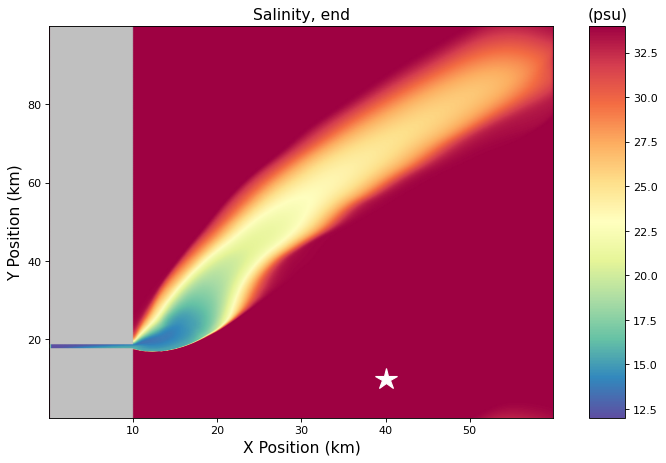

In [12]:
#Plotting surface salinity
Salt = file1.variables['S'][-1,0,:,:]
fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])

current_cmap = plt.cm.get_cmap("Spectral_r").copy()
current_cmap.set_under('silver')

quad1 = ax1.pcolormesh(xq/1000,yq/1000,Salt,cmap=current_cmap,vmin=12.,vmax=34.,shading='gouraud')
#ax1.set_xlim(0,30)
ax1.plot(xq[ix]/1000,yq[iy]/1000,'*w',markersize=20)
#ax1.plot(xq24[250]/1000,yq24[iy]/1000,'*c',Markersize=20)
#ax1.plot(xq24[300]/1000,yq24[iy]/1000,'*c',Markersize=20)
#ax1.plot(xq24[350]/1000,yq24[iy]/1000,'*c',Markersize=20)
#ax1.plot(xq24[450]/1000,yq24[iy]/1000,'*c',Markersize=20)
#ax1.plot(xq24[500]/1000,yq24[iy]/1000,'*c',Markersize=20)

ax1.set_title('Salinity, end', fontsize=14)
#ax1.set_title('Salinity, day=%04.2f ' %(149/48.), fontsize=14)

ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('X Position (km)',fontsize=14)
ax1.set_ylabel('Y Position (km)',fontsize=14)
cb1 = fig.colorbar(quad1,ax2)
plt.title('(psu)', fontsize=14)
plt.show()

(<matplotlib.legend.Legend at 0x2ae640b3ab20>,)

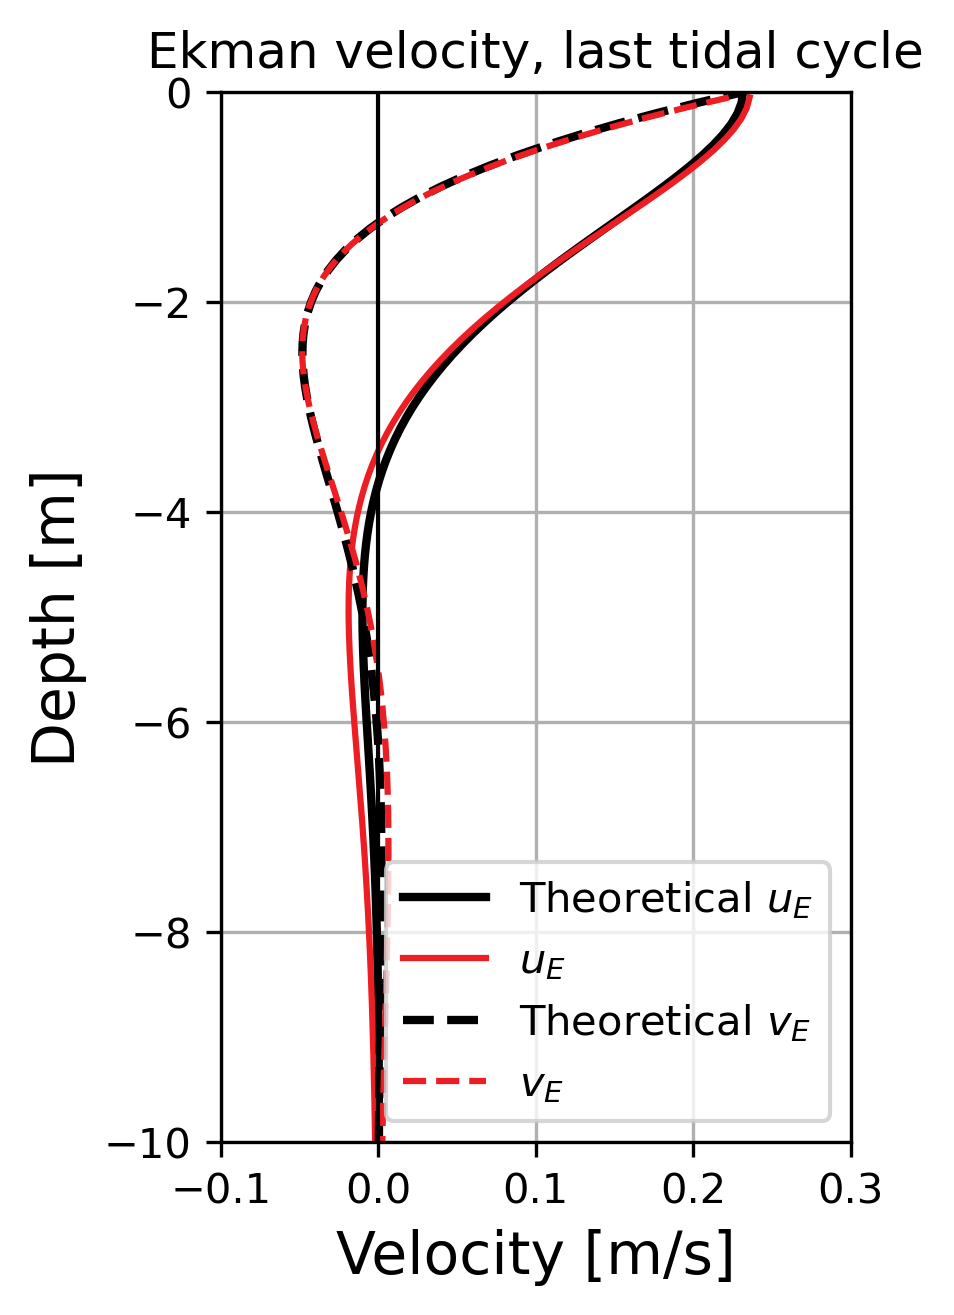

In [25]:
tau=0.03;
A_v=1.e-4;
f=8.e-5;
rho=1024;
z=np.linspace(-10,0,101);
V_0=tau/(rho*(A_v*f)**0.5);
D_E=((2*A_v)/f)**0.5;
u_E=V_0*np.cos((np.pi/4)+(z/D_E))*np.exp(z/D_E);
v_E=V_0*np.sin((np.pi/4)+(z/D_E))*np.exp(z/D_E);


fig = plt.figure(figsize=(3, 5), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)

plt.plot(u_E,z,'-k',linewidth=2)
plt.plot(U32-U32[125],zl,'-',color='#ED1D24')

plt.plot(v_E,z,'--k',linewidth=2)
plt.plot(V32-V32[125],zl,'--',color='#ED1D24')


plt.plot([0,0],[5,-15],color='k',linewidth=1)
plt.grid('on')
plt.xlabel('Velocity [m/s]',fontsize=14);
plt.ylabel('Depth [m]',fontsize=14);
plt.ylim([-10,0])
plt.xlim([-.1,.3])
plt.title('Ekman velocity, last tidal cycle')
plt.legend(['Theoretical $u_{E}$','$u_{E}$','Theoretical $v_{E}$','$v_{E}$'],fontsize=10,loc='lower right'),


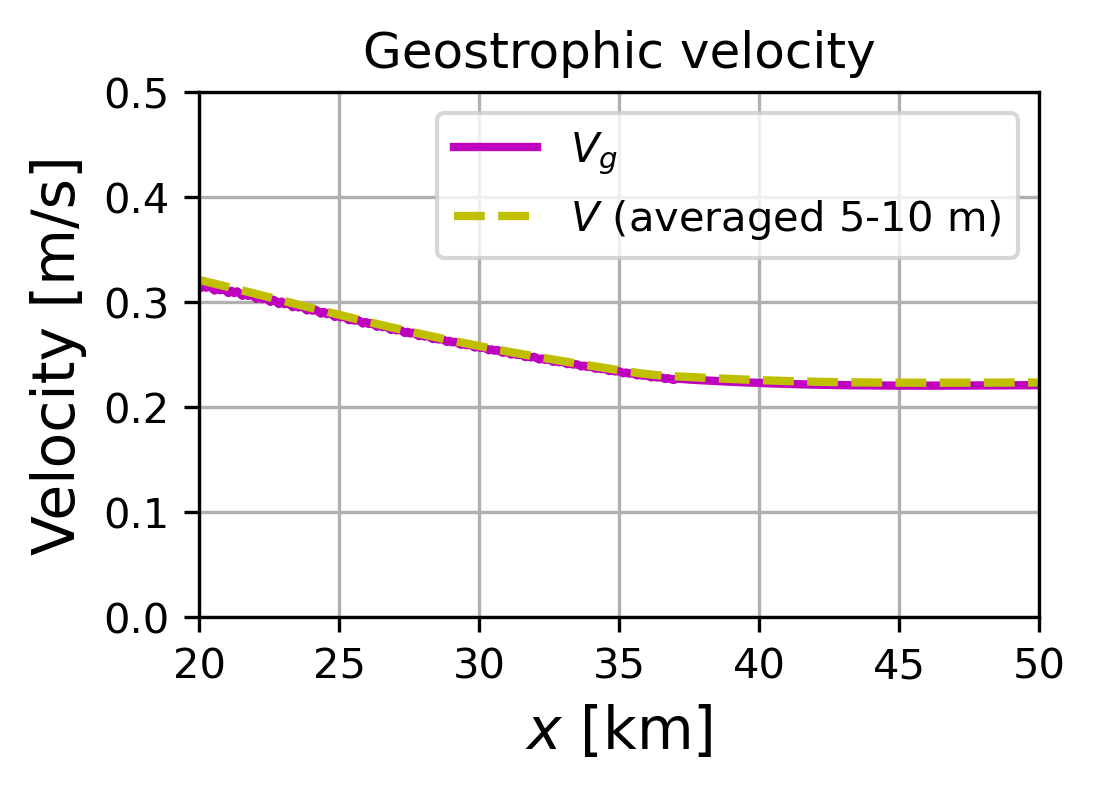

In [40]:
Eta= np.nanmean(file4['Eta'][125:150,100,100:500],axis=0);
V5_10=np.nanmean(np.nanmean(file3['V'][125:150,50:100,iy,100:500],axis=0),axis=0);
V_geo = (np.diff(Eta)/100)*9.81/(8.0e-5)

fig = plt.figure(figsize=(4, 2.5), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)

plt.plot(xq[101:500]/1000,V_geo,'-m',linewidth=2)
plt.plot(xq[100:500]/1000,V5_10,'--',color='y',linewidth=2)

plt.grid('on')
ax1.set_xlabel('$x$ [km]',fontsize=14)
plt.ylabel('Velocity [m/s]',fontsize=14);
plt.xlim([20,50])
plt.ylim([0,0.5])
plt.title('Geostrophic velocity')
plt.legend(['$V_g$','$V$ (averaged 5-10 m)']);


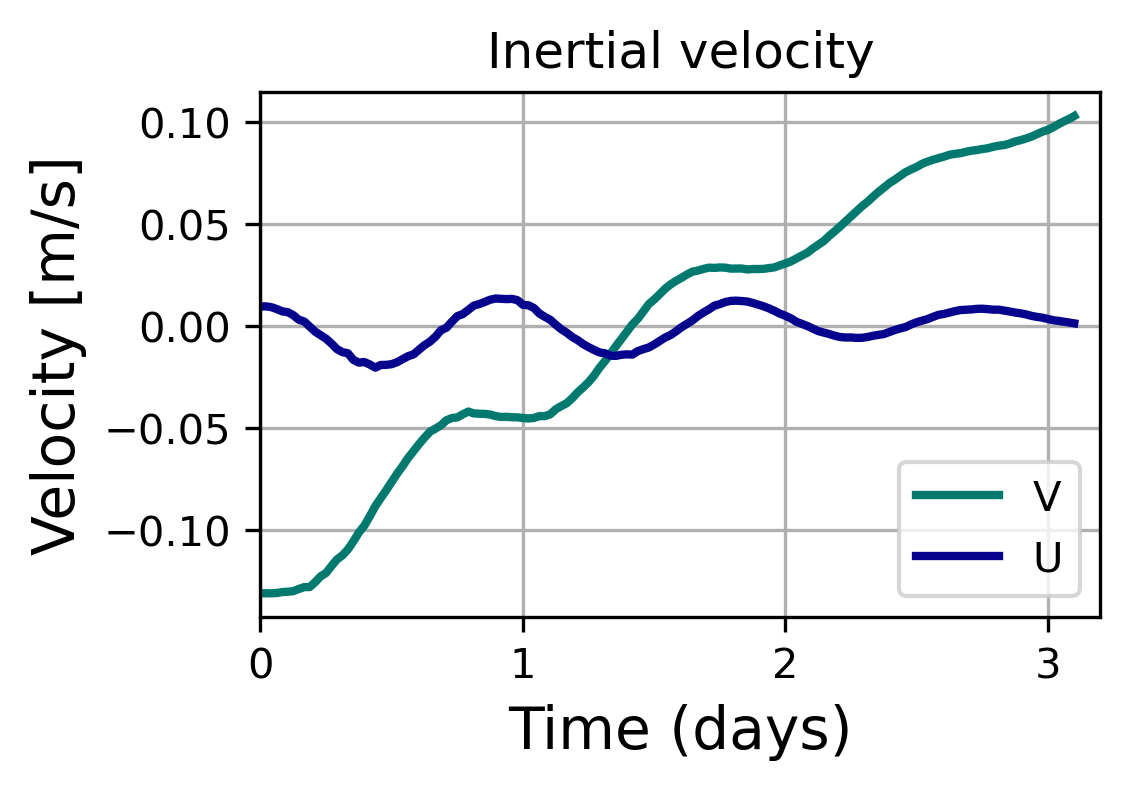

In [45]:
V_ie=(file3['V'][:,125,iy,ix])-np.nanmean(file3['V'][:,125,iy,ix],axis=0);
U_ie =(file2['U'][:,125,iy,ix])-np.nanmean(file2['U'][:,125,iy,ix],axis=0);
Time=file3['T'][:]/(3600*24)

fig = plt.figure(figsize=(4, 2.5), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)

plt.plot(Time,V_ie,'-',color='#01796F',linewidth=2,label='V')
plt.plot(Time,U_ie,'-',color='#06038D',linewidth=2,label='U')

plt.grid('on')
ax1.set_xlabel('Time (days)',fontsize=14)
plt.ylabel('Velocity [m/s]',fontsize=14);
plt.title('Inertial velocity')
plt.xlim([0,3.2])
#plt.ylim([0,0.5])

plt.legend(loc='lower right');